## K-Means Clustering

K-Means Clustering is an unsupervised machine learning algorithm that groups similar datapoints using centroids (center of cluster). Data points that are similary distanced to a cluster are considered part of the cluster/group.

The algorithm works by iteratively updating the centroid of a cluster(s) to minimize the distance of neighboring data points. This process stops when the cluster achieves a specified inertia (resistance to movement). 

In [1145]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

In [ ]:
class Cluster:
    
    def __init__(self, centroid, radius, min_neighbors):

        self.centroid = centroid
        self.neighbors = []
        self.radius = radius
        self.min_neighbors = min_neighbors

    def get_neighbors(self, data):

        return np.array([row[1] for row in data.iterrows() if np.sum((row[1]-self.centroid)**2) <= self.radius**2])
    
    def calc_inertia(self, cluster, new_centroid):

        return np.sum((cluster.centroid - new_centroid) ** 2) ** (1/2)

    def update_centroid(self, data):

        self.neighbors = self.get_neighbors(data)

        if len(self.neighbors) >= self.min_neighbors:

            distances = self.neighbors - self.centroid

            superposition = np.average(distances, axis=0)

            self.centroid += superposition

            return 0
        
        return -1

    


class KMeans:

    def __init__(self, min_inertia, cluster_radius, min_neighbors, k, cluster_padding):

        self.min_inertia = min_inertia
        self.cluster_radius = cluster_radius
        self.min_neighbors = min_neighbors
        self.k = k
        self.cluster_padding = cluster_padding
        self.clusters = []
    
    def fit(self, data):

        min_max_featvals = [(data[feat].min(), data[feat].max()) for feat in data.columns]

        self.clusters = np.array([Cluster(centroid=np.array([(MAX - MIN) * np.random.random_sample() + MIN for MIN, MAX in min_max_featvals]), radius=self.cluster_radius, min_neighbors=self.min_neighbors) for _ in range(self.k)])
        for _ in range(4):

            for cls in self.clusters:

                cls.update_centroid(data)


    
    
    

In [1147]:
X, centroids = make_blobs(n_samples= 100, centers = 2, cluster_std=1, random_state=42)


In [1148]:
kmeans = KMeans(0, 2, 1, 2, 4)
path = kmeans.fit(pd.DataFrame(X))
path = np.array(path)

[[ 4.6262242   2.22007398]
 [-2.66594547  8.94868566]]


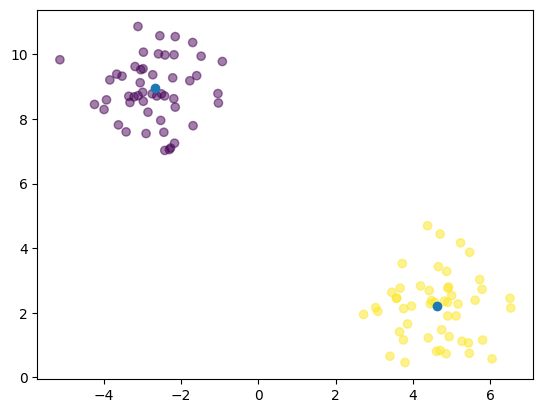

In [1149]:
clusters = np.array([cls.centroid for cls in kmeans.clusters])
print(clusters)
plt.scatter(X[:, 0], X[:, 1], c=centroids, alpha=0.5)
plt.scatter(clusters[:, 0], clusters[:, 1])
